In [ ]:
!pip install pandas
!pip install openpyxl
!pip install NumPy
!pip install scikit-learn
!pip install Matplotlib
import pandas as pd
import matplotlib.pyplot as plt


 **EJERCICIO 2**

**1.- (0,75 puntos) Llevar a cabo el estudio de los outliers de 3 variables (Wind_speed, Ozone_reading,
Visibility) de forma unidimensional. ¿Qué tipo de gráfico es necesario emplear? Interpretar los datos
obtenidos en cada caso?**


Para realizar el estudio de outliers de las variables Wind_speed, Ozone_reading y Visibility, emplearemos gráficos de bigotes (boxplots) para cada una de ellas. Los boxplots son útiles para visualizar la distribución estadística de los datos y destacar valores atípicos.

 Primero debemos ordenar nuestros datos para poder hacer la representación de manera adecuada.
 A partir de ahí calculamos el rango intercuartílico, con sus respectivos q1, q2(mediana) y q3. Para a partir de esta información, calcular el rango crítico a partir del cual un salario se considera outliner y viene representado con un circulo en nuestra gráfica.

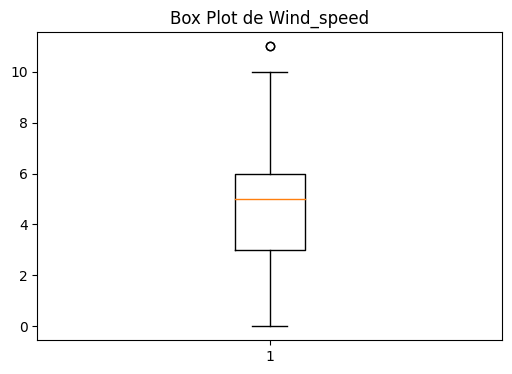

Q1 de la columna: 3.0
Q2 (mediana) de la columna: 5.0
Q3 de la columna: 6.0
IQR de la columna: 3.0
Límite inferior para outliers: -1.5
Límite superior para outliers: 10.5
Número de outliers: 2


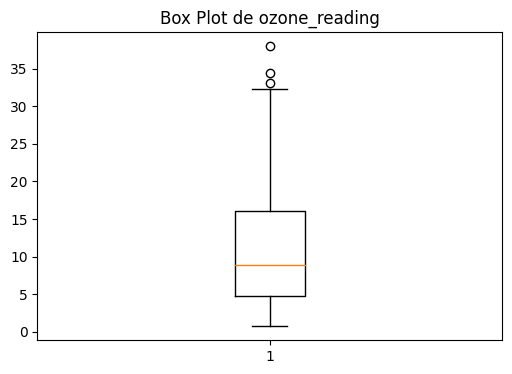

Q1 de la columna: 4.77
Q2 (mediana) de la columna: 8.9
Q3 de la columna: 16.075
IQR de la columna: 11.305
Límite inferior para outliers: -12.1875
Límite superior para outliers: 33.0325
Número de outliers: 3


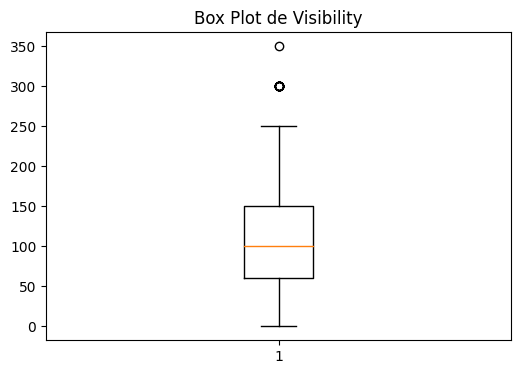

Q1 de la columna: 60.0
Q2 (mediana) de la columna: 100.0
Q3 de la columna: 150.0
IQR de la columna: 90.0
Límite inferior para outliers: -75.0
Límite superior para outliers: 285.0
Número de outliers: 17


In [ ]:

# Cargar el dataset
url2 = "/content/ozone.csv"
data2 = pd.read_csv(url2, sep=";")
data2.head(10)

# Seleccionar las columnas de interés
variables_interes = ['Wind_speed', 'ozone_reading', 'Visibility']
data2_variables = data2[variables_interes]

# Función para calcular Q1, Q2 (mediana), Q3 y contar outliers
def calculate_and_plot_boxplot(column_data):
    # Ordenar los datos
    sorted_data = column_data.sort_values()

    # Calcular Q1, Q2 y Q3
    q1 = sorted_data.quantile(0.25)
    q2 = sorted_data.median()
    q3 = sorted_data.quantile(0.75)

    # Calcular el rango intercuartílico (IQR)
    iqr = q3 - q1

    # Definir los límites para identificar outliers
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    # Contar outliers
    outliers_count = ((column_data < lower_limit) | (column_data > upper_limit)).sum()


    # Crear el diagrama de caja
    plt.figure(figsize=(6, 4))
    plt.boxplot(sorted_data)
    plt.title(f'Box Plot de {column_data.name}')
    plt.show()

    # Imprimir resultados
    print(f'Q1 de la columna: {q1}')
    print(f'Q2 (mediana) de la columna: {q2}')
    print(f'Q3 de la columna: {q3}')
    print(f'IQR de la columna: {iqr}')
    print(f'Límite inferior para outliers: {lower_limit}')
    print(f'Límite superior para outliers: {upper_limit}')
    print(f'Número de outliers: {outliers_count}')

# Calcular y plotear para cada columna
for variable in variables_interes:
    calculate_and_plot_boxplot(data2_variables[variable])



Ahora, interpretaremos los datos para cada variable.

1. Wind_speed:
La mediana (línea central en el rectángulo) es 3, lo que sugiere que la velocidad del viento tiende a ser moderada, es el boxplot com mayor simetría, lo que quier decir que los datos no estan casi sesgados.

Hay valores atípicos en el extremo superior (fuera del rango intercuartílico).En concreto tenemos 2 y son dos valores 11,estos superan el límite superior del rango intercuartílico que es 10.5.
Esto indica que hay momentos en los que la velocidad del viento es significativamente más alta que la mayoría de las observaciones. Esto podría relacionarse con condiciones climáticas excepcionales o algún evento inusual.

2. Ozone_reading:
La mediana es 8.9. Hay tres valores atípicos en el extremo superior, superando el valor de 33 en nuestra base de datos, estos estan muy lejos del rango medio de valores. Esto sugiere que en ciertos momentos, la concentración de ozono es considerablemente más alta que la mayoría de las observaciones. Estos valores atípicos podrían relacionarse con mucha humedad, poca visibilidad... estos son otros factores también de estudio que en su composicion nos crean valores atípicos. También podría ser debido a variables no estudiadas como la contaminación.

 Además nos muestra una gráfica asimétrica, esto indica una distribución más sesgada o desigual. Cuando una base de datos tiene una distribución sesgada, significa que la frecuencia de ocurrencia de los valores se agrupa en un extremo de la distribución, lo que puede afectar a la interpretación de las medidas estadísticas.

3. Visibility:
La mediana  es 100.Es la variable con mayor número de outliners(17 en concreto). Los valores atípicos en el extremo superior podrían indicar momentos de visibilidad excepcionalmente mala, o debido al gran número de ellos, igual puede tener errores de medición o datos mal registrados.

**2.- (0,75 puntos) Estudiar la intersección y la unión de outliers entre las variables “Wind_speed” y
“Visibility”.**

Para estudiar la intersección y la unión de outliers entre las variables "Wind_speed" y "Visibility":

Para encontrar la Intersección:
Vamos a identificar los outliers para cada variable por separado.
Encontramos la intersección de estos conjuntos, es decir, los puntos que son outliers tanto en "Wind_speed" como en "Visibility".

Para encontrar la Unión:
Vamos a encontrar la unión de los conjuntos, es decir, todos los puntos que son outliers en al menos una de las dos variables.

In [ ]:
def calculate_outliers(column_data):
    # Calcular Q1, Q3
    q1 = column_data.quantile(0.25)
    q3 = column_data.quantile(0.75)

    # Calcular el rango intercuartílico (IQR)
    iqr = q3 - q1

    # Definir los límites para identificar outliers
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    # Identificar outliers
    outliers = (column_data < lower_limit) | (column_data > upper_limit)

    return outliers

# Calcular outliers para cada columna
outliers_wind_speed = calculate_outliers(data2['Wind_speed'])
outliers_visibility = calculate_outliers(data2['Visibility'])

# Calcular intersección y unión
interseccion_outliers = outliers_wind_speed & outliers_visibility
union_outliers = outliers_wind_speed | outliers_visibility

# Imprimir resultados
print(f'Intersección de outliers: {interseccion_outliers.sum()}')
for index, row in data2[interseccion_outliers].iterrows():
    print(f"Wind_speed: {row['Wind_speed']}, Visibility: {row['Visibility']}")

print(" ")

print(f'Unión de outliers: {union_outliers.sum()}')
for index, row in data2[union_outliers].iterrows():
    print(f"Wind_speed: {row['Wind_speed']}, Visibility: {row['Visibility']}")





Intersección de outliers: 1
Wind_speed: 11.0, Visibility: 350.0
 
Unión de outliers: 18
Wind_speed: 11.0, Visibility: 350.0
Wind_speed: 10.0, Visibility: 300.0
Wind_speed: 5.0, Visibility: 300.0
Wind_speed: 8.0, Visibility: 300.0
Wind_speed: 7.0, Visibility: 300.0
Wind_speed: 5.0, Visibility: 300.0
Wind_speed: 7.0, Visibility: 300.0
Wind_speed: 11.0, Visibility: 200.0
Wind_speed: 0.0, Visibility: 300.0
Wind_speed: 3.0, Visibility: 300.0
Wind_speed: 6.0, Visibility: 300.0
Wind_speed: 6.0, Visibility: 300.0
Wind_speed: 7.0, Visibility: 300.0
Wind_speed: 5.0, Visibility: 300.0
Wind_speed: 7.0, Visibility: 300.0
Wind_speed: 4.0, Visibility: 300.0
Wind_speed: 0.0, Visibility: 300.0
Wind_speed: 4.0, Visibility: 300.0


En nuestros diagramas de bigotes visualizados antes, vemos que encontramos un total de 19 outliers entre las dos variables. Viendo la unión y la interseción vemos que tiene sentido que exista por ello 1 outlier de intersección y 18 de unión ya que quitamos el repetido (solo lo contamos una vez).

Además teniendo como referencia una vez más nuestros diagrama de bigotes, vemos que los outliers en ambas variables se encuentras en los extremos superiores.

Por ello, la intersección de outliers hace referencia a un día en el que coincidieron altas velocidades de viento con mala visibilidad. Pero al ver que únicamente 1 suceso de 19 sucesos excepcionales coincide, podemos ver que estas variables no estan directamente relacionadas, ya que sino, en concreto la velocidad del viento(que es la variable con más outliers), habría influenciado más en la visibilidad en el registro de cada día.

Podemos demostrar esto viendo la correlación de nuestras variables:


In [ ]:
correlation = data2_variables['Wind_speed'].corr(data2_variables['Visibility'])
print(f"Correlación entre Wind_speed y Visibility: {correlation}")

Correlación entre Wind_speed y Visibility: 0.04534341383628436


Observamos que efectivamente la correlación es cercana a 0, luego nuestras variables no estan directamente relacionadas.




**3.- (1 punto) Categoriza algunas de las variables y lleva a cabo representaciones que nos permitan
relacionar diferentes variables ¿Qué nos dicen los datos?**



<ipython-input-14-7b6d735f8202>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Humidity_category', y='Pressure_gradient', data=data_selected2, palette='viridis')


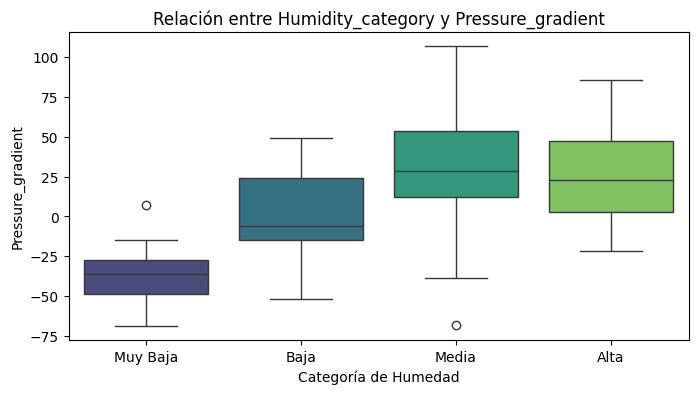

In [ ]:
import seaborn as sns


# Seleccionamos las variables de interés
selected_variables2 = ['Humidity', 'Temperature_ElMonte','Inversion_temperature', 'Pressure_gradient']
data_selected2 = data2[selected_variables2].copy()

data_selected2['Humidity_category'] = pd.cut(data_selected2['Humidity'], bins=[0, 25, 50, 75, 100], labels=['Muy Baja', 'Baja', 'Media', 'Alta'])

# Gráfico de Bigotes (Boxplot) para relacionar 'Pressure_gradient' con 'Humidity_category' colores por categorías
plt.figure(figsize=(8, 4))
sns.boxplot(x='Humidity_category', y='Pressure_gradient', data=data_selected2, palette='viridis')
plt.title('Relación entre Humidity_category y Pressure_gradient')
plt.xlabel('Categoría de Humedad')
plt.ylabel('Pressure_gradient')
plt.show()





Hemos realizado un gráfico de bigotes comparando una variable cuantitativa, y otra variable humedad separada en categorías.

Observando la gráfica y la distribución de datos coloreados por la categoría de humedad, se puede notar que para la categoría "Muy Baja" de humedad, la presión tiende a ser mucho más baja en comparación con las otras categorías. Esto es debido a q la humedad atmosférica actúa como un moderador de la temperatura. Cuando la humedad es baja, hay menos agua en el aire para absorber y retener el calor.
Estos cambios de temperatura pueden influir en la presión atmosférica, ya que la presión tiende a disminuir con el calentamiento y aumentar con el enfriamiento. Luego tendrían una relacion directa estas dos variables, pero no muy significativa, ya que lo apreciamos mayoritariamnete en humedades bajas y no tanto en todo el dominio.

In [ ]:
correlation = data_selected2['Humidity'].corr(data_selected2['Pressure_gradient'])
print(f"Correlación entre Humidity y Pressure gradient: {correlation}")


Correlación entre Humidity y Pressure gradient: 0.6243353561683189


Para verificar esta relación hemos calculado la correlación que existe entre ambas variables. Vemos como resultado que el valor es próximo a 1, luego nuestras predicciones son ciertas

A continuación, vamos a relacionar otras dos variables:
la inversion de temperatura y la temperatura "El monte". Para ello también categorizamos una de ellas y representamos ambas, esta vez en un gráfico de barras.

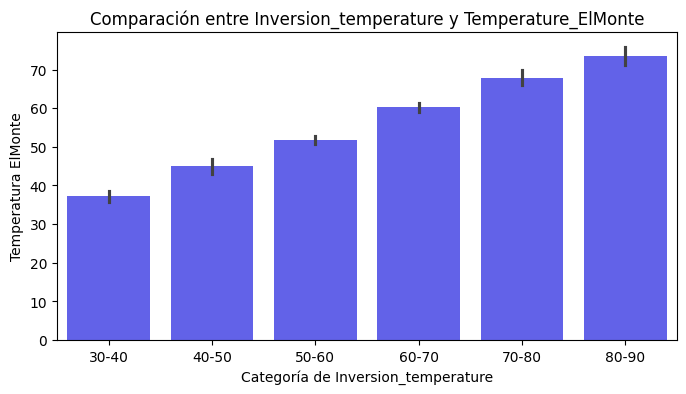

In [ ]:
# Categorizar la variable 'Inversion_temperature'
data_selected2['Inversion_temperature_category'] = pd.cut(data_selected2['Inversion_temperature'], bins=[30, 40, 50, 60, 70, 80, 90], labels=['30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])


# Crear una figura y ejes para la subgráfica
plt.figure(figsize=(8, 4))

# Gráfico de barras para comparar 'Inversion_temperature_category' y 'Temperature_ElMonte'
sns.barplot(x='Inversion_temperature_category', y='Temperature_ElMonte', data=data_selected2, color='blue', alpha=0.7)

# Ajustes de etiquetas y título
plt.title('Comparación entre Inversion_temperature y Temperature_ElMonte')
plt.xlabel('Categoría de Inversion_temperature')
plt.ylabel('Temperatura ElMonte')

# Mostrar el gráfico
plt.show()





In [ ]:
correlation = data_selected2['Inversion_temperature'].corr(data_selected2['Temperature_ElMonte'])
print(f"Correlación entre Inversion_temperature y Temperature_ElMonte: {correlation}")

Correlación entre Inversion_temperature y Temperature_ElMonte: 0.9308098907114302



Al observar la gráfica que representa la relación entre la categoría de inversión térmica y la temperatura en El Monte, podemos concluir que hay una clara tendencia positiva. A medida que la categoría de inversión térmica aumenta, indicando posiblemente una intensificación de la inversión térmica, observamos un aumento en la temperatura en El Monte. Este patrón sugiere una relación directa entre la inversión térmica y las condiciones térmicas locales.

La inversión térmica es un fenómeno atmosférico en el cual la temperatura aumenta con la altura en lugar de disminuir, lo que puede llevar a la formación de capas estables de aire. Por lo que tiene sentido njuestra representación gráfica y la relación de nuestras variables.

La relación positiva que hemos identificado podría tener implicaciones importantes, ya que cambios en la inversión térmica pueden influir en la temperatura en la región.
Además verificamos la relación directa viendo al correlación positiva de las variables.




**4.- (1 punto) Se desea saber cómo se distribuyen y cuáles son las frecuencias de las principales variables
respecto a los días de medición. Lleva a cabo la representación más útil (sólo una). Justificar la respuesta**

Vamos a categorizar los días de medición en meses del año, ya que como la base de datos tiene valores de 'Month','Day of Month' y 'Day of the week', estos valores nos pueden aportar más información si los juntamos en una variable categórica.

Además, vamos a estudiar primero la frecuencia de nuestras variables principales con respecto a los meses del año y posteriormente la distribución de estas mismas.


In [ ]:
# Seleccionar las columnas de interés
variables_interes3 = ['Temperature_Sandburg', 'pressure_height', 'Inversion_temperature','Temperature_ElMonte','Inversion_base_height','Month']
data_selected3 = data2[variables_interes3].copy()
# Categorizamos los meses

data_selected3['Month_category'] = pd.cut(data_selected3['Month'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Sept', 'Oct', 'Nov', 'Dic'])



Seleccionamos nuestras variables principales basandonos en las variables que tengan mas correlación unas con otras(en valor absoluto más cercanas a 1). Ya que queremos tratar de conseguir las variables que aporten la máxima información de nuestra base de datos, y para ello necesitamos las que más relacionadas esten con el resto de variables.

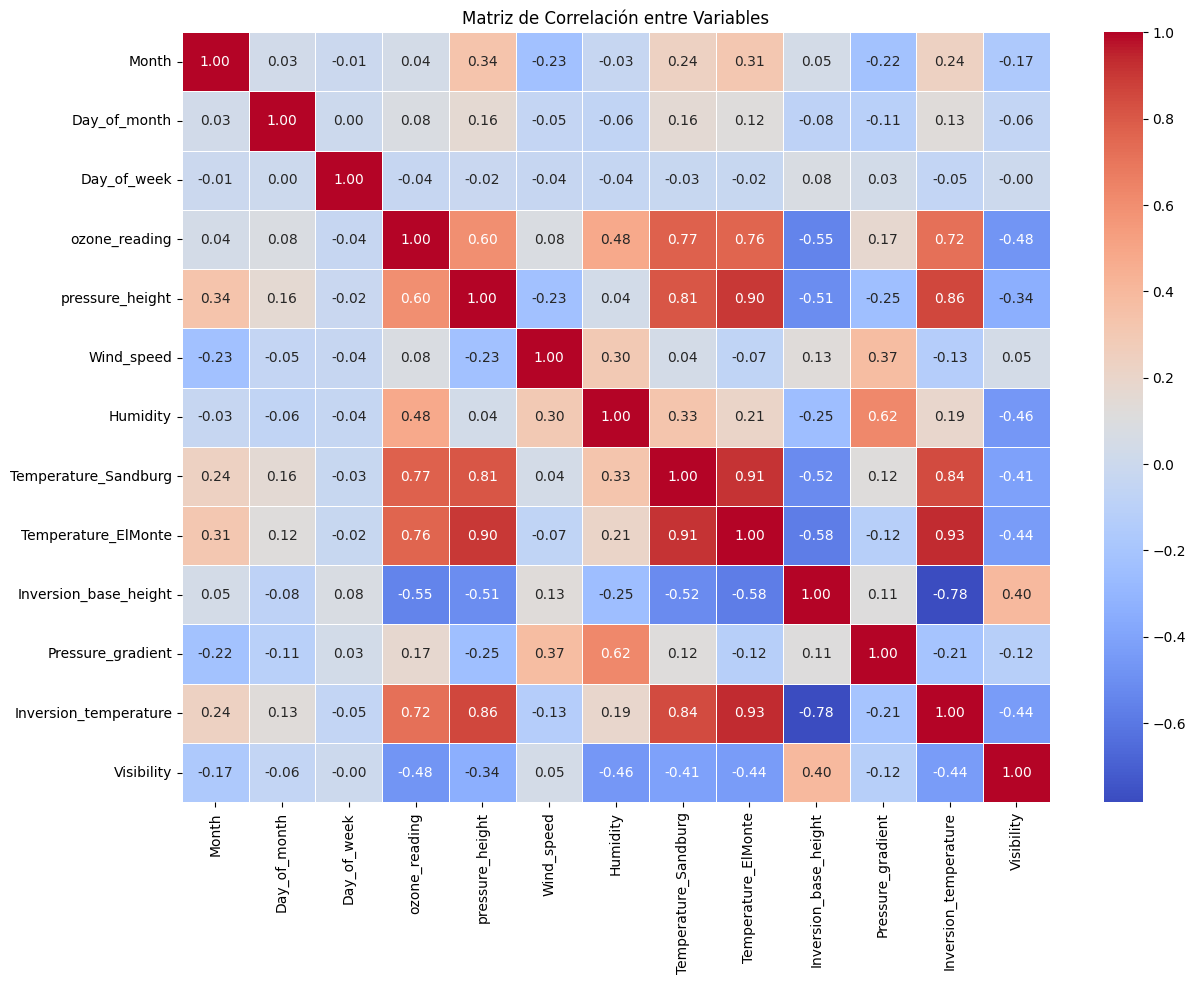

In [ ]:
# Seleccionar las columnas relevantes
variables_relacionadas_humedad = ['Month', 'Day_of_month', 'Day_of_week', 'ozone_reading', 'pressure_height',
                                  'Wind_speed', 'Humidity', 'Temperature_Sandburg', 'Temperature_ElMonte',
                                  'Inversion_base_height', 'Pressure_gradient', 'Inversion_temperature', 'Visibility']

# Crear un DataFrame con las variables seleccionadas
data_relacionada_humedad = data2[variables_relacionadas_humedad]

# Calcular la matriz de correlación
correlation_matrix = data_relacionada_humedad.corr()

# Crear un mapa de calor para visualizar la correlación
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación entre Variables')
plt.show()

Vemos que nuestras variables más correlacionadas son:
'Temperature_Sandburg',  'pressure_height',
 'Inversion_temperature', 'Temperature_ElMonte', 'Inversion_base_height'. Luego estas son las variables principales que vamos a seleccionar para nuestro estudio.

Ahora, vamos a representar estas variables en un gráfico de barras apiladas para ver las frecuencias de cada una de ellas por mes. Hemos utilizado este diagrama ya que este tipo de gráfico se utiliza generalmente para representar una variable cualitativa(los meses categorizados) junto a varias cuantitativas(nuestras variables principales).

Cada barra se divide en segmentos que representan las contribuciones individuales de las variables. La altura de cada segmento indica la frecuencia de esa variable en relación con el total y la altura total de la barra representa la suma total de frecuencias en ese día.

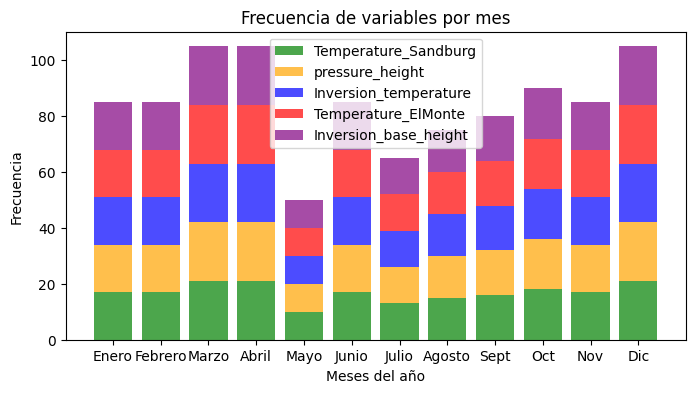

In [ ]:

import numpy as np
# Crear una figura y ejes para la subgráfica
plt.figure(figsize=(8, 4))

# Posiciones para cada día de medición
positions = np.arange(len(data_selected3['Month_category'].unique()))


# Gráfico de barras apiladas para las variables seleccionadas por mes
plt.bar(positions, data_selected3.groupby('Month_category')['Temperature_Sandburg'].count(), label='Temperature_Sandburg', color='green', alpha=0.7)
plt.bar(positions, data_selected3.groupby('Month_category')['pressure_height'].count(), bottom=data_selected3.groupby('Month_category')['Temperature_Sandburg'].count(), label='pressure_height', color='orange', alpha=0.7)
plt.bar(positions, data_selected3.groupby('Month_category')['Inversion_temperature'].count(), bottom=data_selected3.groupby('Month_category')['Temperature_Sandburg'].count() + data_selected3.groupby('Month_category')['pressure_height'].count(), label='Inversion_temperature', color='blue', alpha=0.7)
plt.bar(positions, data_selected3.groupby('Month_category')['Temperature_ElMonte'].count(), bottom=data_selected3.groupby('Month_category')['Temperature_Sandburg'].count() + data_selected3.groupby('Month_category')['pressure_height'].count() + data_selected3.groupby('Month_category')['Inversion_temperature'].count(), label='Temperature_ElMonte', color='red', alpha=0.7)
plt.bar(positions, data_selected3.groupby('Month_category')['Inversion_base_height'].count(), bottom=data_selected3.groupby('Month_category')['Temperature_Sandburg'].count() + data_selected3.groupby('Month_category')['pressure_height'].count() + data_selected3.groupby('Month_category')['Inversion_temperature'].count() + data_selected3.groupby('Month_category')['Temperature_ElMonte'].count(), label='Inversion_base_height', color='purple', alpha=0.7)

# Ajustes de etiquetas y título
plt.title('Frecuencia de variables por mes')
plt.xlabel('Meses del año')
plt.ylabel('Frecuencia')
plt.xticks(positions, data_selected3['Month_category'].unique())  # Etiquetas de los meses
plt.legend()

# Mostrar el gráfico
plt.show()




A partir de esta gráfica, observamos una consistencia notable en las contribuciones de cada variable, sugiriendo que estas se encuentran presentes en la misma proproción en todos los días del mes. Este equilibrio en la contribución de las variables crea uniformidad en la distribución de datos a lo largo del tiempo.

También, hemos identificado que la variabilidad en la altura total de las barras está directamente relacionada con la cantidad de datos registrados en cada mes. La presencia de variaciones mensuales indica que la recopilación de datos no es uniforme a lo largo del año, mostrando ciertos meses con una mayor frecuencia de observaciones que otros.

Una vez estudiada su frecuencia, pasamos a estudiar la distribución de cada variable por mes del año.

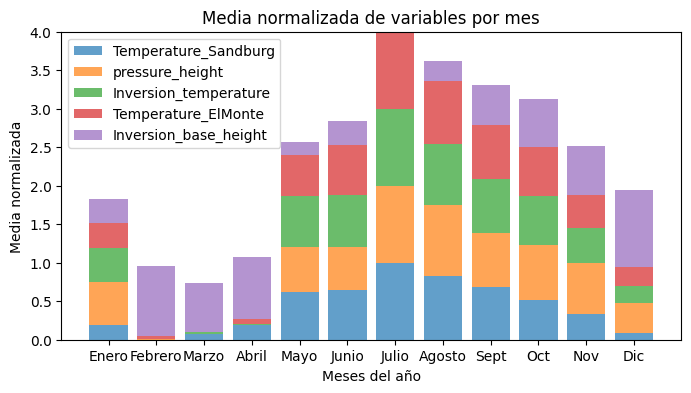

In [ ]:

from sklearn.preprocessing import MinMaxScaler

# Crear una figura y ejes para la subgráfica
plt.figure(figsize=(8, 4))

# Variables seleccionadas
variables = ['Temperature_Sandburg', 'pressure_height', 'Inversion_temperature', 'Temperature_ElMonte', 'Inversion_base_height']

# Posiciones para cada día de medición
positions = np.arange(len(data_selected3['Month_category'].unique()))

# Calcular la media de cada variable por mes
means_by_month = data_selected3.groupby('Month_category')[variables].mean()

# Normalizar los datos utilizando Min-Max scaling
scaler = MinMaxScaler()
means_normalized = scaler.fit_transform(means_by_month)

# Gráfico de barras apiladas para las medias normalizadas por mes
bottom = np.zeros(len(data_selected3['Month_category'].unique()))

for i, variable in enumerate(variables):
    plt.bar(positions, means_normalized[:, i], label=variable, alpha=0.7, bottom=bottom)
    bottom += means_normalized[:, i]

# Ajustes de etiquetas y título
plt.title('Media normalizada de variables por mes')
plt.xlabel('Meses del año')
plt.ylabel('Media normalizada')
plt.xticks(positions, data_selected3['Month_category'].unique())  # Etiquetas de los meses
plt.legend()

# Mostrar el gráfico
plt.show()


Hemos creado un gráfico de barras apiladas que muestra la media normalizada de diferentes variables a lo largo de los meses del año.

Cada barra representa un mes, y los colores dentro de cada barra indican la contribución de cada variable a la media normalizada total para ese mes

Hemos decidido normalizar las medias de las variables para poder compararlas en una escala común, ya que originalmente pueden tener diferentes unidades de medida o rangos de valores. Esto es importante para poder observar las tendencias y patrones sin que las diferencias de escala distorsionen la interpretación de los datos.

Observando la gráfica que hemos creado, vemos que las medias normalizadas de las variables cambian a lo largo de los meses del año. Esto nos sugiere que hay una estacionalidad en las variables que estamos analizando. Por ejemplo, la variable 'Temperature_ElMonte' muestra valores más elevados durante los meses de verano, lo que coincide con nuestras expectativas de un incremento de temperatura en esa época del año.

Además, notamos que la altura de la base de la inversión térmica, representada por 'Inversion_base_height', se mantiene relativamente constante, con una pequeña disminución en los meses de verano. Esto podría indicar que el fenómeno de inversión térmica es menos pronunciado durante esos meses.

La 'pressure_height' alcanza su punto máximo en abril, lo que podría estar relacionado con patrones de presión atmosférica específicos de la primavera.

La normalización nos ha permitido identificar estas tendencias y comparar directamente las contribuciones de cada variable a lo largo del tiempo.